# Lecture 4 - Model Selection and Generalization

Last class we introduced **linear regression** with polynomial features and discussed the different system components.

Let $\{(x_i,t_i)\}_{i=1}^N$ be a set of training data samples, where each sample $x_i$ and target $t_i$ are continuous-valued, i.e. $x_i, t_i \in\mathbb{R}$.

1. **Feature Space:** we can create a *deterministic* set of features with, for example, polynomials:

$$\phi(x_i) = \left[1, x_i, x_i^2, \dots, x_i^{M-1}\right]^T$$

Each data sample $\{x_i\}_{i=1}^N$ will have its own representation, and so we can build a **data matrix** (or feature matrix) of size $N\times M$:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M-1}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M-1}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M-1}
\end{array}\right]$$

2. **Mapper**: a linear combination of features weighted by a set of parameters $\mathbf{w}=\left[w_0, w_1, w_2,\dots, w_{M-1}\right]^T$, taking the form

$$y = f(\phi(x),\mathbf{w}) = \sum_{j=0}^{M-1} w_j\phi_j(x)$$

or, in matrix form,

$$y = f(\phi(x),\mathbf{w}) = \mathbf{X}\mathbf{w}$$

3. **Objective Function**: function that assesses the *quality* of the output of the model, for example, an error-based function such as L2-norm of the error or the mean-squared error (MSE) function:

$$J(\mathbf{w}) = \frac{1}{2N} \sum_{n=1}^N \left(t_n - f(\phi(x_n),\mathbf{w})\right)^2 = \frac{1}{2N}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2$$

4. **Learning Algorithm**: an algorithm that solves or searches for the *optimal* values of the parameters $\mathbf{w}$ that optimize the objective function. It solves the following optimization problem:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$

This is the **least mean squares (LMS)** function.

Because the selected model is linear on the parameters, we can solve for a solution analytical without having to resort to search algorithms such as the gradient descent.

Therefore, the solution for the parameters $\mathbf{w}$ is the one that solves the equation

$$\frac{\partial J(\mathbf{w})}{\partial\mathbf{w}}=0$$

We can use calculus algebra to take this derivative and solve for $\mathbf{w}$ (see Lecture 3 notes for this approach), or we can refer to our knowledge of statistics. Recall that the want the output $\mathbf{y}$ to be as close as possible to the target response $\mathbf{t}$, therefore, we are solving for $\mathbf{w}$ using the following equation:

$$\mathbf{t} = \mathbf{X}\mathbf{w}$$

But, note that $\mathbf{X}$ is a tall matrix (usually - and ideally - $N>>M$), so we **cannot** just that the left-inverse of $\mathbf{X}$.

This is the problem of finding the best line (or curve) that fits a set of points:

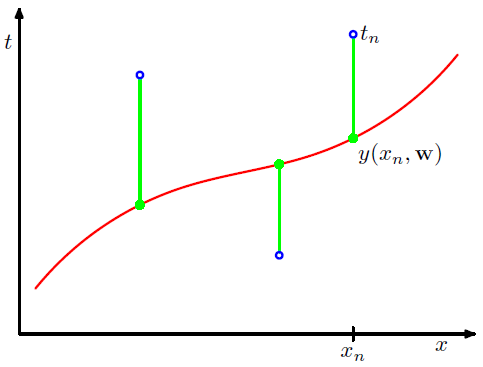

In [1]:
from IPython.display import Image
Image('figures/LeastSquares.png', width=400)

From your statistics course, you learned a solution to this problem: the **least squares solution**, which provides us with an analytical solution for $\mathbf{w}$, the $\mathbf{w}^*$:

$$\mathbf{w}^* = \mathbf{X}^{\dagger}\mathbf{t}$$

where $\mathbf{X}^{\dagger}$ is the pseudo-inverse of the tall matrix $\mathbf{X}$ and can be computed as

$$\mathbf{X}^{\dagger} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T$$

**This completes the training stage.** For any given input data, we can compute its polynomial representation and find a solution for $\mathbf{w}$:

$$\mathbf{w}^* = \mathbf{X}_{\text{train}} ^{\dagger}\mathbf{t}_{\text{train}}$$

and 

$$y_{\text{train}} = \mathbf{X}_{\text{train}}\mathbf{w}^*$$ 

In the **testing stage**, for any point we first component its polynomial representation, and then use the trained model (essentially the optimal set of parameters $\mathbf{w}^*$) to compute a prediction for that point:

$$y_{\text{test}} = \mathbf{X}_{\text{test}}\mathbf{w}^*$$ 

## Code Implementation

**What can you control?** 

<!-- * Model order $M$
* Feature representation or *basis functions* -->

How would you implement linear regression using polynomial features?
 * Let's see with an example.

## Polynomial Curve Fitting

### Example: Suppose Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{(x - \mu)^2}{2\sigma^2}\right\}$$

where $\mu$ is the mean and $\sigma^2$ is the variance. 

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

$$t = y + \epsilon$$

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation gVar'''
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N) 
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    return x, t

In [3]:
# Generate input samples and desired values

N = 50 # number of data samples
a, b = [0,1] # data samples interval
sigma_train = 0.3 # standard deviation of the zero-mean Gaussian noise
sigma_test = 0.1
x_train, t_train = NoisySinusoidalData(N, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(20, a, b, sigma_test) # Test Data - Noisy sinusoidal

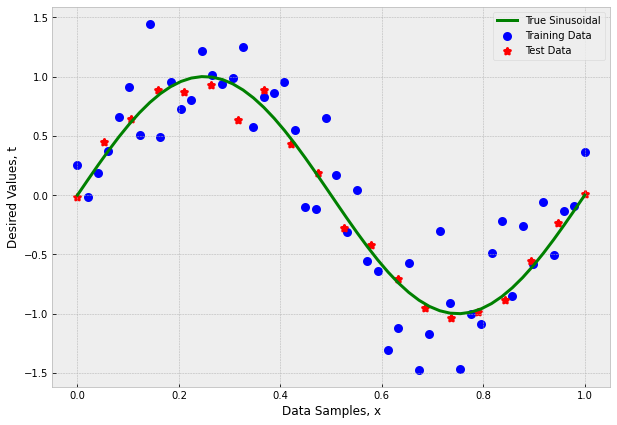

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b',linewidths=3,  label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=3, label = 'True Sinusoidal')
plt.scatter(x_test, t_test,c='r', marker='*',linewidths=3, label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Now, let us implement linear regression with polynomial features or **polynomial regression**.

Before build this function, let's take a look at some strategies to create the **data matrix** $\mathbf{X}$:

In [5]:
M = 3
x = np.array([1,2,3,4,5])

In [6]:
[x[2]**m for m in range(M)]

[1, 3, 9]

In [7]:
np.array([x**m for m in range(M)])

array([[ 1,  1,  1,  1,  1],
       [ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]], dtype=int32)

In [8]:
np.array([x**m for m in range(M)]).T

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16],
       [ 1,  5, 25]], dtype=int32)

In [9]:
X = np.array([x**m for m in range(M)]).T

In [10]:
X.shape

(5, 3)

In [13]:
def PolynomialRegression(x, t, M):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

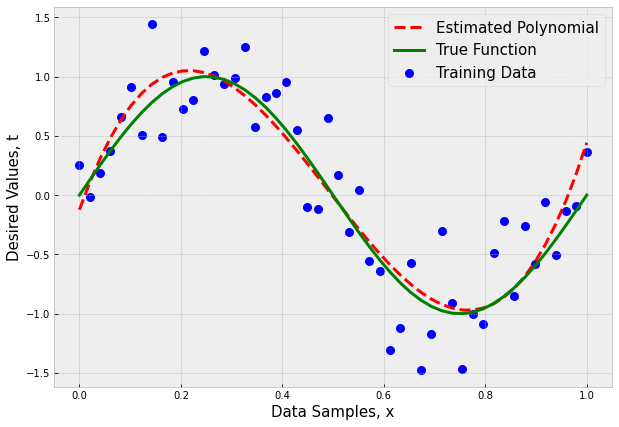

In [28]:
# Model Order
M = 4

# Find the parameters that fit the noisy sinusoidal
w, y_train, error = PolynomialRegression(x_train,t_train,M) 

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train, c='b',linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3,label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g',linewidth=3, label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

### Observations

* What happens when the polynomial model order $M$ increases/decreases?

* How large/small do the weight parameter values are as we increase $M$? Could this information be useful?

* Which model order $M$ works best? Which $M$ would you choose?

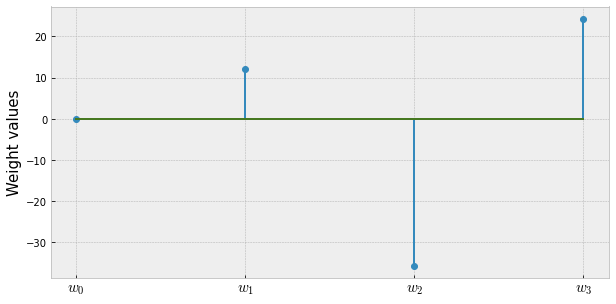

In [29]:
plt.figure(figsize=(10,5))

plt.stem(w)

plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0, size=15);


Let's see how well does this trained model **generalize** to the test data, to which we do not have labels.

- In this synthetic environment, we have the label values for the test samples. But in practice, we will **not** have labels for the test data.

**Testing Stage**
* Apply the same feature extraction as in training: $\mathbf{X}_{test}$, where $\mathbf{X}_{test}$ is a $K\times M$ data matrix
* Predict the output using the learned parameters $\mathbf{w}^*$, that is, $\mathbf{y}_{test} = \mathbf{X}_{test}\mathbf{w}^*$

In [30]:
Xtest = np.array([x_test**m for m in range(M)]).T

Xtest.shape

(20, 4)

3. **Predict Labels.** In this step, we will use the trained model (the vector of coefficients $\mathbf{w}^*$ and compute the predicted labels for the feature representation of the test samples.

In [31]:
def PolynomialRegression_test(x, M, w):
    X = np.array([x**m for m in range(M)]).T
    y = X@w
    return y

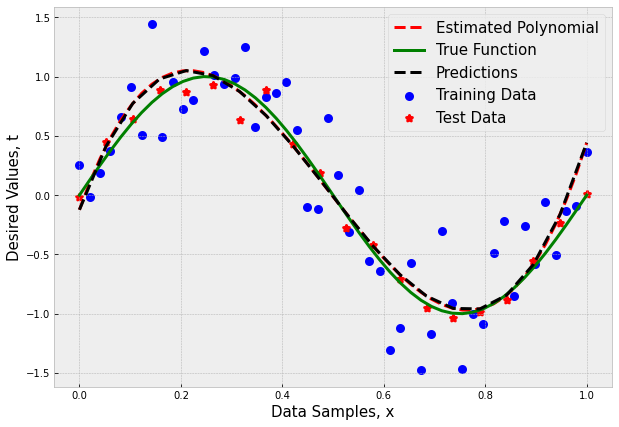

In [32]:
y_test = PolynomialRegression_test(x_test, M, w)

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train,c='b', linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3, label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', linewidth=3, label = 'True Function')
plt.scatter(x_test,t_test,c='r', marker='*', linewidths=3, label = 'Test Data')
plt.plot(x_test,y_test,'k--',linewidth=3, label = 'Predictions')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

### Observations:

* How did the trained model *fit* in the test data?
* Is it able to *generalize*?
* Can we **design** a *training* strategy that can tells us how *well* we are performing in *unseen and unlabeled* data?

* What happens when the test points fall outside the range of what the model has *learned*?

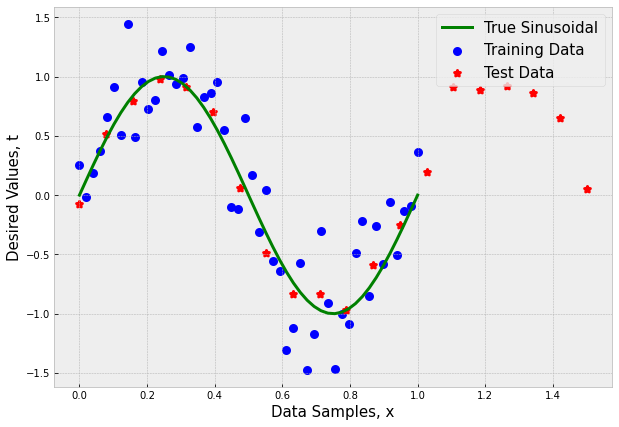

In [33]:
M = 4
w, y, error = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(20, 0, 1.5, 0.1)

plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=3, label = 'True Sinusoidal')
plt.scatter(x_test2, t_test2, c='r', marker='*',linewidths=3, label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

<IPython.core.display.Javascript object>


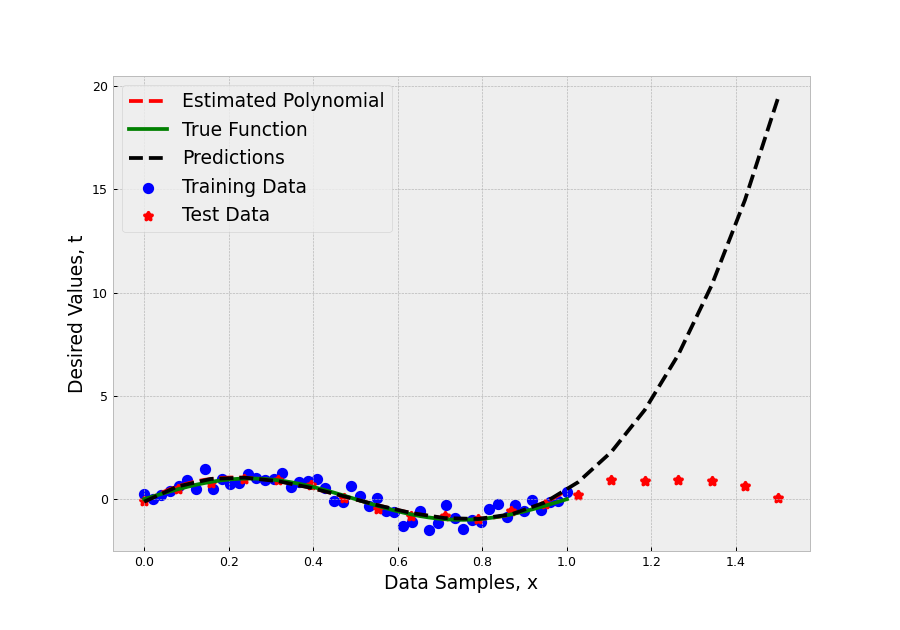

In [35]:
%matplotlib notebook

y_test2 = PolynomialRegression_test(x_test2, M, w)

plt.figure(figsize=(10,7))
plt.scatter(x_train,t_train,c='b', linewidths=3, label='Training Data')
plt.plot(x_train,y_train,'r--', linewidth=3, label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', linewidth=3, label = 'True Function')
plt.scatter(x_test2,t_test2,c='r', marker='*', linewidths=3, label = 'Test Data')
plt.plot(x_test2,y_test2,'k--',linewidth=3, label = 'Predictions')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

* How do we select the *best* model order? - Cross-validation